In [1]:
import sys
sys.path.append("../src/")

from classic_pid_controller import ClassicPidController
from bathtub import Bathtub
from cournot import CournotCompetition
from rabbits import Rabbits
from consys import ConSys
from plot_utils import plot_classic_pid

## Classic PID controller

### Bathtub

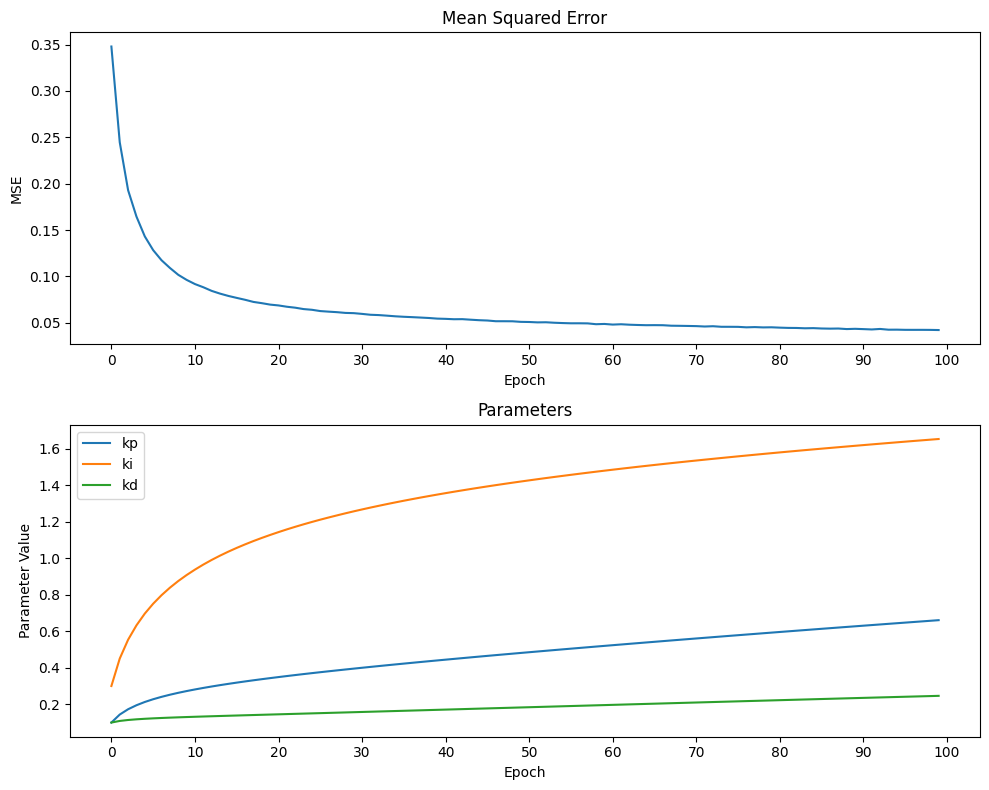

In [2]:
### Bathtub params:
A = 10.0      # cross-sectional area
C = A/100   # cross-sectional-drain area
H = 10.0      # initial height
g = 9.8     # gravitational constant

### ConSys params:
no_epochs = 100
timesteps_per_epoch = 10
learning_rate = 0.2
min_noise_value = -0.01
max_noise_value = 0.01

### Controller params:
controller_params = [0.1, 0.3, 0.1]     # kp, ki, kd

controller = ClassicPidController()
plant = Bathtub(A, C, H, g)
consys = ConSys(controller, plant, no_epochs, timesteps_per_epoch, learning_rate, min_noise_value, max_noise_value)
mse_list, params_matrix = consys.simulate(controller_params)

plot_classic_pid(mse_list, params_matrix)


### Cournot

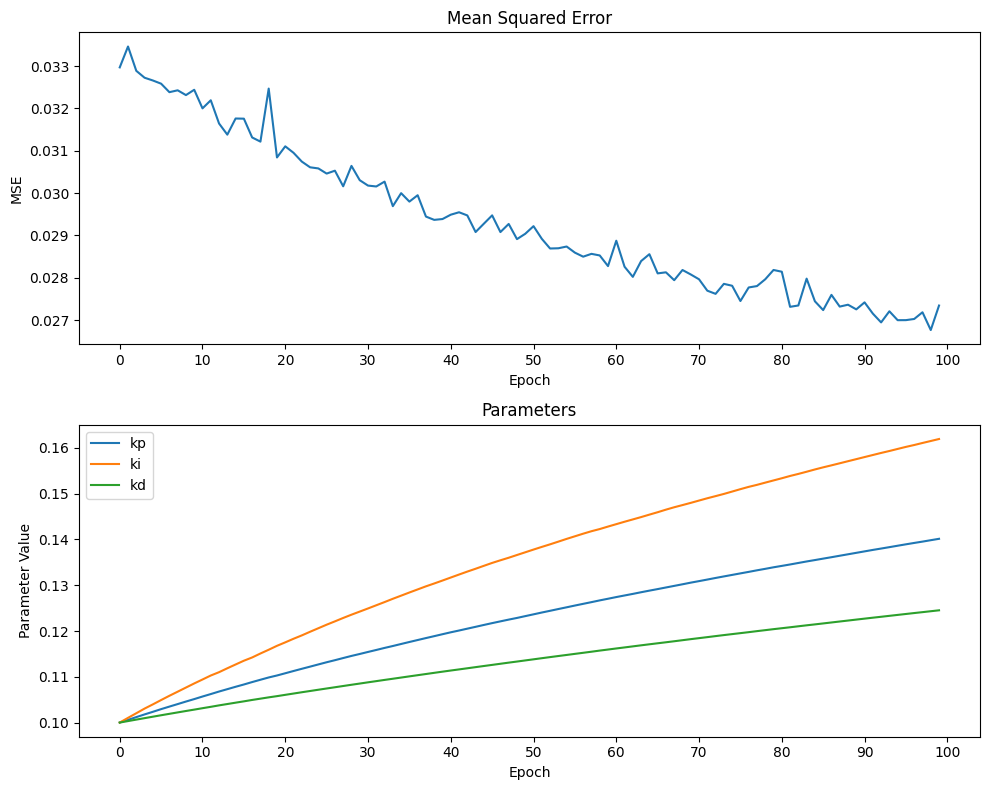

In [3]:
### CournoutCompetition params:
T = 0.6   # Target profit per timestep
c_m = 0.1   # Marginal cost
q1 = 0.1   # initial quantity produced by 1
q2 = 0.3   # initial quantity produced by 2
p_max = 2.0 # maximum market price

### ConSys params:
no_epochs = 100
timesteps_per_epoch = 10
learning_rate = 0.01
min_noise_value = -0.01
max_noise_value = 0.01

### Controller params:
controller_params = [0.1, 0.1, 0.1]     # kp, ki, kd

controller = ClassicPidController()
plant = CournotCompetition(target_profit=T, marginal_unit_cost=c_m, own_quantity=q1, competitor_quantity=q2, maximum_price=p_max)
consys = ConSys(controller, plant, no_epochs, timesteps_per_epoch, learning_rate, min_noise_value, max_noise_value)
mse_list, params_matrix = consys.simulate(controller_params)

plot_classic_pid(mse_list, params_matrix)

### Rabbits

In [4]:
""" Rabbits and foxes; We will model a population of rabbits and one of foxes, where the foxes prey
on the rabbits. Rabbits are born at rate a1 and die naturally at rate a2, and die due to interaction
with foxes at rate a3. In addition, due to external effects on the rabbits' birth rate, there is a time
varying, additive component + a4 sin(a5 · t). Rabbits killed by wildlife population control is 
represented by U (the control signal).

Foxes die naturally at rate b1 and are born from interaction with rabbits at rate b2. 
There is also some noise in the birthrate of foxes, represented by the term D (disturbance).


Task: keep rabbit population stable at initial population.
We assume that wildlife population management always make sure that neither the rabbit population nor the fox population
ever gets lower than 1 individual.
"""

" Rabbits and foxes; We will model a population of rabbits and one of foxes, where the foxes prey\non the rabbits. Rabbits are born at rate a1 and die naturally at rate a2, and die due to interaction\nwith foxes at rate a3. In addition, due to external effects on the rabbits' birth rate, there is a time\nvarying, additive component + a4 sin(a5 · t). Rabbits killed by wildlife population control is \nrepresented by U (the control signal).\n\nFoxes die naturally at rate b1 and are born from interaction with rabbits at rate b2. \nThere is also some noise in the birthrate of foxes, represented by the term D (disturbance).\n\n\nTask: keep rabbit population stable at initial population.\nWe assume that wildlife population management always make sure that neither the rabbit population nor the fox population\never gets lower than 1 individual.\n"

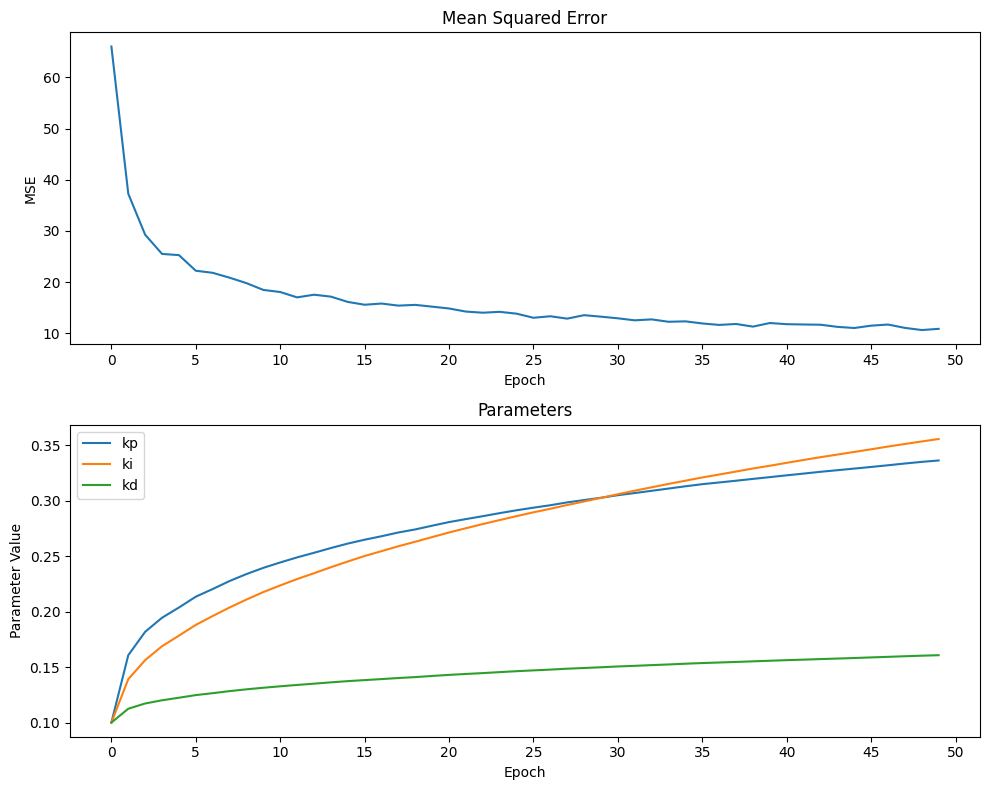

In [5]:
### Rabbit population params:
a1 = 0.35     # rabbit birth rate
a2 = 0.01     # rabbit natural death rate
a3 = 0.05     # rabbit killed by fox rate
a4 = 0.3      # rabbit external birthrate factors param 1
a5 = 0.4      # rabbit external birthrate factors param 2
b1 = 0.3      # fox natural death rate
b2 = 0.015    # fox birthrate
rabbit_start_population = 26
fox_start_population = 3

### ConSys params:
no_epochs = 50
timesteps_per_epoch = 50
learning_rate = 0.0001
min_noise_value = -0.1
max_noise_value = 0.1

### Controller params:
controller_params = [0.1, 0.1, 0.1]     # kp, ki, kd

controller = ClassicPidController()
plant = Rabbits(a1, a2, a3, a4, a5, b1, b2, rabbit_start_population, fox_start_population)
consys = ConSys(controller, plant, no_epochs, timesteps_per_epoch, learning_rate, min_noise_value, max_noise_value)
mse_list, params_matrix = consys.simulate(controller_params)

plot_classic_pid(mse_list, params_matrix)
